(16, 250)
[0.28202279 0.29307909]
[0.713201   0.68277135]
[(array([161]),), (array([185]),)] [(array([127]),), (array([88]),)]
(16, 250)


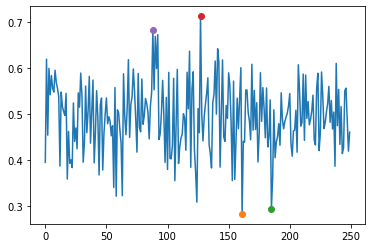

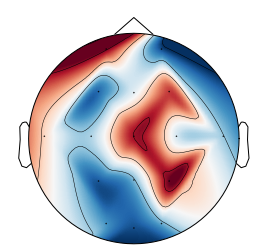

4 [(array([161]),), (array([185]),), (array([127]),), (array([88]),)]
(4, 20)
[(0.15725916943440088, 0.5608029545832915), (-0.06870089183246186, 0.8004150132379663), (-0.22976044476891674, 0.39198159915807335), (0.03696678907851489, 0.8918862448595185), (-0.4036007665689614, 0.12107889192803856), (0.35370176043793633, 0.17895649320631338), (-0.0968026769903152, 0.7213611236885481), (0.08149739310133934, 0.7641427149459951), (-0.4107827411753484, 0.11398119245772709), (-0.12709771830610234, 0.6390257073996631), (-0.09111769484502505, 0.7371689014919168), (0.015999995029993608, 0.9531021543297862), (-0.2773740254381485, 0.2983005942770179), (-0.17286139783568377, 0.5220393644433166), (-0.21548771923746707, 0.4228336606904923), (-0.2924313810068568, 0.27172945919386443)]


In [2]:
import numpy as np
import mne
import matplotlib
import scipy
from random import random
import matplotlib.pyplot as plt
from scipy.signal import argrelextrema
from scipy.signal import argrelmax, argrelmin
from mne.viz import plot_topomap

# Creating time window of interest
time = 250*1

# Creating fake data = [channels x time-points]
fake = np.random.rand(16,time)
print(fake.shape)

# Averaging all channels to get GFP
avg = np.mean(fake,0)
plt.figure(1)
plt.plot(avg)

# Find min and max peaks
idx_min = argrelextrema(avg, np.less)
idx_max = argrelmax(avg)

# Sort max and min in order to get EXTREME VALUES
sorted_min = np.sort(avg[idx_min])
sorted_max = np.sort(avg[idx_max])[::-1]
print(sorted_min[0:2])
print(sorted_max[0:2])

# Obtain INDEXES from the 4 extreme values of interest: Highest peaks and throughs
# The topography at these points will be compared to the 4 Template MicroStates
c_min = [np.where(avg == sorted_min[i]) for i in range(2)]
c_max = [np.where(avg == sorted_max[i]) for i in range(2)]
print(c_min, c_max)

# Plotting these 4 extreme values inside the GFP
plt.plot(c_min[0][0], sorted_min[0], 'o')
plt.plot(c_min[1][0], sorted_min[1], 'o')
plt.plot(c_max[0][0], sorted_max[0], 'o')
plt.plot(c_max[1][0], sorted_max[1], 'o')

# Plotting as an example a topography in one of these 4 extreme values
montage = mne.channels.make_standard_montage(kind='biosemi16')
info = mne.create_info(montage.ch_names[:16], 250, 'eeg', montage=montage)
plt.figure(2)
print(fake.shape)
plot_topomap(fake[:,int(c_min[0][0])], pos=info, cmap='RdBu_r', vmin=0, vmax=np.max, show=True)

# Concatenate INDEXES from points of interest
four_peaks = c_min + c_max
print('4',four_peaks)

# Loading template microstates
template=np.loadtxt('../../../Desktop/fake_microstate.txt')
print(template.shape)

# Making correlation comparisons between 4 MicroStates and 
correlation = list()
for i in range(4):
    for j in range(4):
        corr = scipy.stats.pearsonr(template[i,0:16], fake[:,int(four_peaks[j][0])])
        correlation.append(corr)
print(correlation)



In [86]:
template=np.loadtxt('../../../Desktop/fake_microstate.txt')
print(len(template))

4


(1, 250)


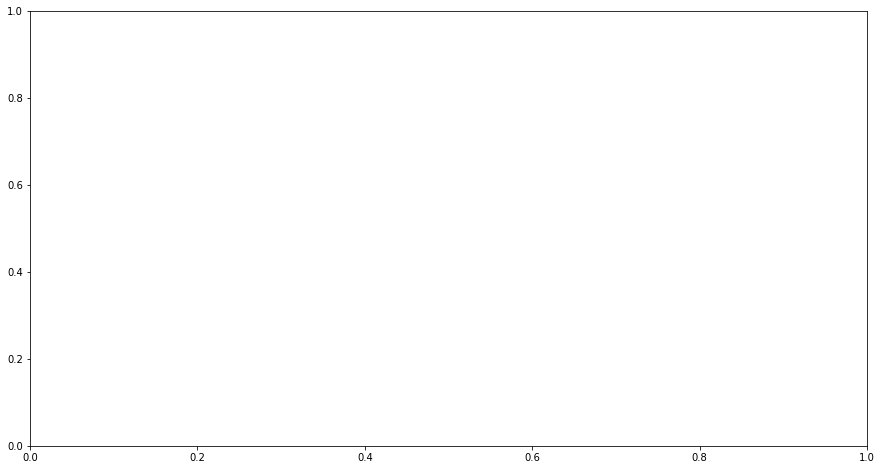

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.animation as animation
from IPython.display import HTML
%matplotlib inline

# Creating time window of interest
time = 250*1

# Creating fake data = [channels x time-points]
fake_perc = np.random.rand(1,time)
print(fake_perc.shape)

# color_dict = {'RED': 'red', 'YELLOW': 'yellow','BLUE': 'blue', 'GREEN': 'green', 'BLACK': 'black'}
fig, ax = plt.subplots(figsize=(15, 8))
def draw_barchart(i):
    ax.clear()
    if fake_perc[0,i] > 0.8: 
        color = 'red' 
    else:
        color = 'blue'
    ax.bar(1, fake_perc[0,i], align='center', color=color)
    ax.axes.axis([0, 1, 0, 1])

#draw_barchart(10)


# HTML(animator.to_html5_video())

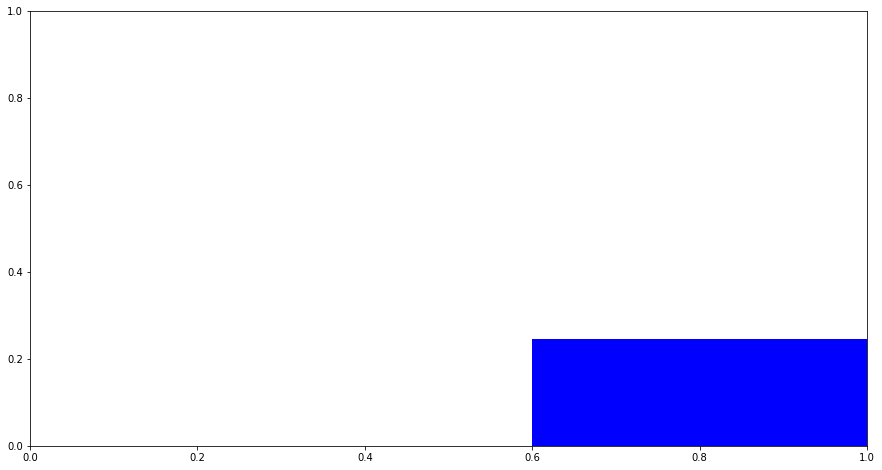

In [88]:
import matplotlib.animation as animation
from IPython.display import HTML
fig, ax = plt.subplots(figsize=(15, 8))
# fig = plt.figure()
animator = animation.FuncAnimation(fig, draw_barchart, frames=range(1, 20))
HTML(animator.to_html5_video())#animator.to_jshtml()) 

In [1]:
from turtle import Turtle,Screen, mainloop
import random, time
import matplotlib.pyplot as plt
from PIL import Image, ImageTk
from turtle import *
import turtle
 
# fig, ax = plt.subplots(figsize=(15, 8))    
 
# Setup a default screen size and Title
wn = Screen()
wn.setup(width = 500, height = 500)
 
# Update the temperature bar height and value
def drawbar(temp):
    top = (-50 + 260 * temp/40)
    boutline = ((0,-50),(20,-50),(20,top),(-20,top),(-20,-50),(0,-50))
    bar.penup()
    bar.clear()  # clear the old bar and text
    bar.begin_fill()
    for pos in boutline:
        bar.goto(pos)
        bar.end_fill()
        bar.goto(30,top)
        bar.write(str(temp) + " C",font=("Arial",24, "bold"))  
        
# define a static thermo backgroup object and a dynamic bar object
thermo = Turtle()
thermo.penup()
bar = Turtle()
bar.color("red")
bar.hideturtle()
 
# define an array for the top tube
outline = ((0,-50),(25,-50),(25,210),(-25,210),(-25,-50),(0,-50))
thermo.hideturtle()
thermo.pensize(5)
for pos in outline:
    thermo.goto(pos)
    thermo.pendown()
 
# add some temperature labels
thermo.penup()
thermo.goto(50,-50)
thermo.write("0 C")
thermo.goto(50,210)
thermo.write("40 C")
 
# draw the filled bulb at the bottom
thermo.goto(0,-137)
thermo.pendown()
thermo.pensize(5)
thermo.color("black","red")
thermo.begin_fill()
thermo.circle(50)
thermo.end_fill()

canvas = thermo.getcanvas()
    
# Update the temperature
while True:
#        humidity, temperature = Adafruit_DHT.read_retry(11, 4)
       # use a random number for testing
       #temperature = random.randint(0,40)
       drawbar(11)
       time.sleep(5)


AttributeError: 'Turtle' object has no attribute 'getcanvas'

In [12]:
import matplotlib.animation as animation
from IPython.display import HTML
# fig, ax = plt.subplots(figsize=(15, 8))
# fig = plt.figure()
# wn = Screen()
# wn.setup(width = 500, height = 500)

animator = animation.FuncAnimation(thermo, drawbar, frames=range(1, 20))
HTML(animator.to_html5_video())#animator.to_jshtml()) 

AttributeError: 'Turtle' object has no attribute 'canvas'